https://www.kaggle.com/datasets/pentakrishnakishore/bank-customer-churn-data

### Definiciones de los Campos del Conjunto de Datos

| **Campo**                             | **Descripción**                                                                 |
|---------------------------------------|---------------------------------------------------------------------------------|
| **customer_id**                       | Identificador único para cada cliente.                                          |
| **vintage**                           | Duración de la relación del cliente con la empresa.                             |
| **age**                               | Edad del cliente.                                                              |
| **gender**                            | Género del cliente.                                                            |
| **dependents**                        | Número de dependientes que tiene el cliente.                                    |
| **occupation**                        | Ocupación del cliente.                                                         |
| **city**                              | Ciudad en la que se encuentra el cliente.                                       |
| **customer_nw_category**              | Categoría de patrimonio neto del cliente.                                       |
| **branch_code**                       | Código que identifica la sucursal asociada con el cliente.                      |
| **current_balance**                   | Saldo actual en la cuenta del cliente.                                          |
| **previous_month_end_balance**        | Saldo de la cuenta al final del mes anterior.                                   |
| **average_monthly_balance_prevQ**     | Saldo mensual promedio en el trimestre anterior.                                |
| **average_monthly_balance_prevQ2**    | Saldo mensual promedio en el segundo trimestre anterior.                        |
| **current_month_credit**              | Monto de crédito en el mes actual.                                              |
| **previous_month_credit**             | Monto de crédito en el mes anterior.                                            |
| **current_month_debit**               | Monto de débito en el mes actual.                                               |
| **previous_month_debit**              | Monto de débito en el mes anterior.                                             |
| **current_month_balance**             | Saldo de la cuenta en el mes actual.                                            |
| **previous_month_balance**            | Saldo de la cuenta en el mes anterior.                                          |
| **churn**                             | Variable objetivo que indica si el cliente ha abandonado (1 para abandonado, 0 para no abandonado). |
| **last_transaction**                  | Marca de tiempo de la última transacción del cliente.                           |

In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mode
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import  confusion_matrix



In [3]:
filename    =   "churn_prediction.csv"
df          =   pd.read_csv(filename)

# Inspeccion de la BBDD

### Tamaño del DataFrame

In [4]:
df.shape

(28382, 21)

### Primeros elementos

In [5]:
df.head(3)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

In [7]:
df.nunique()

customer_id                       28382
vintage                            1459
age                                  90
gender                                2
dependents                           15
occupation                            5
city                               1604
customer_nw_category                  3
branch_code                        3185
current_balance                   27903
previous_month_end_balance        27922
average_monthly_balance_prevQ     27801
average_monthly_balance_prevQ2    27940
current_month_credit              10411
previous_month_credit             10711
current_month_debit               13704
previous_month_debit              14010
current_month_balance             27944
previous_month_balance            27913
churn                                 2
last_transaction                    361
dtype: int64

No presenta valores duplicados, debido a la coincidencia decustomer_id de nunique() con info()

## Valores NaN

In [8]:
df_NaN      =   df.isna().sum().reset_index()
df_NaN_por  =   round(df.isna().sum()/(df.shape[0])*100,2)

df_NaN["porcentaje"]    =   df_NaN_por.values
df_NaN

,index,0,porcentaje
0,customer_id,0,0.00
1,vintage,0,0.00
2,age,0,0.00
3,gender,525,1.85
4,dependents,2463,8.68
5,occupation,80,0.28
6,city,803,2.83
7,customer_nw_category,0,0.00
8,branch_code,0,0.00
9,current_balance,0,0.00


 - observamos que la columna que presenta mayor cantidad de valores NaN es la columnas **dependents**, con 2463 valores que representa el 8.68% de las filas
 - **city** lo sigue con 803 (2.83%)
 - **gender** con 525 (1.85%)
 - y finalemente **occupation** con 80 (0.28%)

# Revision de las columnas

## Vintage

In [9]:
df.vintage.value_counts().sort_index()

vintage
73      1
138     1
317     1
330     1
429     1
       ..
2472    7
2473    5
2474    2
2475    2
2476    2
Name: count, Length: 1459, dtype: int64

c:\Users\herna\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


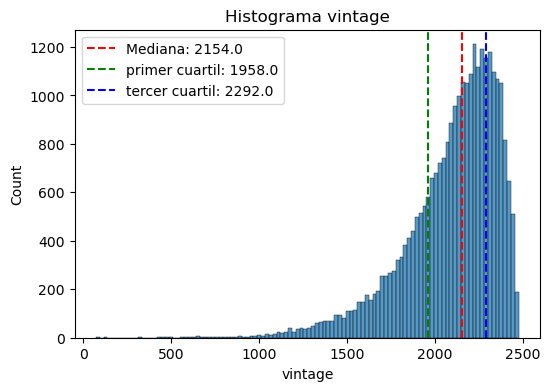

In [10]:
fig, axs    =   plt.subplots(1,1,figsize=(6,4))

columna =   "vintage"
primer_q    =   np.quantile(df[columna],0.25)
mediana     =   np.quantile(df[columna],0.5)
tercer_q    =   np.quantile(df[columna],0.75)


sns.histplot(df,x=columna, ax=axs)
plt.title(f"Histograma {columna}")
axs.axvline(mediana, color='red', linestyle='--', label=f'Mediana: {mediana}')
axs.axvline(primer_q, color='green', linestyle='--', label=f'primer cuartil: {primer_q}')
axs.axvline(tercer_q, color='blue', linestyle='--', label=f'tercer cuartil: {tercer_q}')
axs.legend()
plt.show()

Se observa que la relacion de los clientes con la empresa llega a ser hasta cerca de los 2500 dias, en cambio, el minimo tiempo registrado es de 73 dias, la mediana es de 2154 dias

## Age

In [11]:
df.age.value_counts().sort_index()

age
1        4
2       17
3       34
4       34
5       41
      ... 
86      44
87      34
88      20
89      24
90    1003
Name: count, Length: 90, dtype: int64

In [12]:
df  =   df[df["age"]>=18]

c:\Users\herna\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


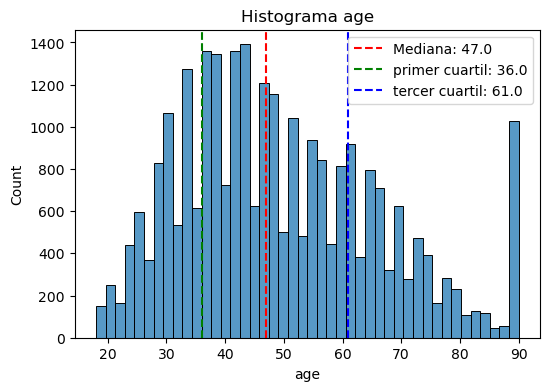

In [13]:
fig, axs    =   plt.subplots(1,1,figsize=(6,4))

columna =   "age"
primer_q    =   np.quantile(df[columna],0.25)
mediana     =   np.quantile(df[columna],0.5)
tercer_q    =   np.quantile(df[columna],0.75)


sns.histplot(df,x=columna, ax=axs)
plt.title(f"Histograma {columna}")
axs.axvline(mediana, color='red', linestyle='--', label=f'Mediana: {mediana}')
axs.axvline(primer_q, color='green', linestyle='--', label=f'primer cuartil: {primer_q}')
axs.axvline(tercer_q, color='blue', linestyle='--', label=f'tercer cuartil: {tercer_q}')
axs.legend()
plt.show()

Se observa una peculiaridad cuando en los datos, y es con respecto a las personas que tienen la edad de 90 anios, los cuales son un total de mas de 1000 registros que representa el 3.53% de los datos totales

In [14]:
df_edad =   df.groupby("occupation")["age"].agg(["max","min","mean", "median"])
df_edad

,max,min,mean,median
occupation,,,,
company,90,29,71.461538,90.0
retired,90,34,72.173419,72.0
salaried,90,18,44.133274,43.0
self_employed,90,18,50.417929,48.0
student,76,18,24.512918,24.0


c:\Users\herna\anaconda3\envs\myenv\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


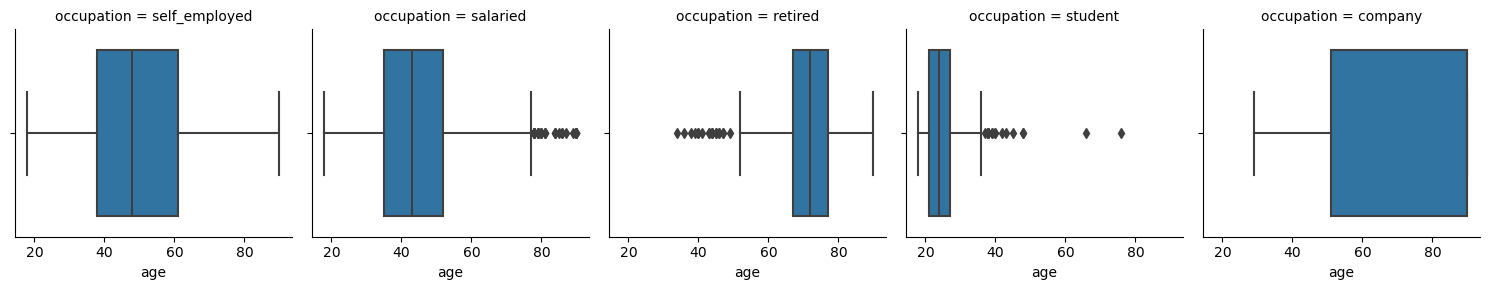

In [15]:
g = sns.FacetGrid(df,  col="occupation")
g.map(sns.boxplot, "age")

In [16]:
def calculate_boxplot_bounds(data):

    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return lower_bound, upper_bound


In [17]:
df_filtered = df.copy()

for occupation in df.occupation.unique():
    data = df[df["occupation"] == occupation]["age"]
    if len(data) == 0:
        continue
    low, high = calculate_boxplot_bounds(data)
    condition = (df_filtered["occupation"] == occupation) & ((df_filtered["age"] < low) | (df_filtered["age"] > high))
    df_filtered = df_filtered[~condition]




c:\Users\herna\anaconda3\envs\myenv\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


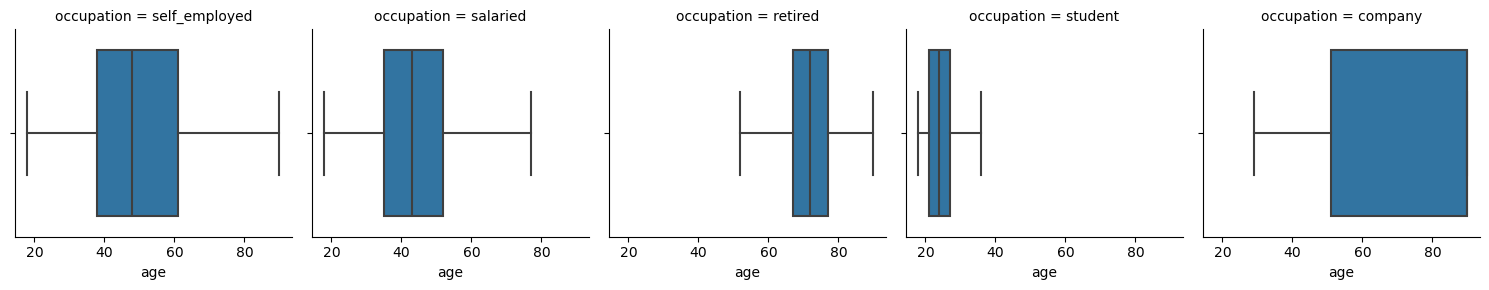

In [18]:
g = sns.FacetGrid(df_filtered,  col="occupation")
g.map(sns.boxplot, "age")

In [19]:
df=df_filtered[:]

In [20]:
df.age.value_counts().sort_index()/df.shape[0]*100

age
18    0.247201
19    0.305366
20    0.450778
21    0.458049
22    0.603461
        ...   
86    0.152683
87    0.119965
88    0.072706
89    0.083612
90    3.624400
Name: count, Length: 73, dtype: float64

## Gender

In [21]:
df.gender.value_counts()

gender
Male      16086
Female    10900
Name: count, dtype: int64

Con respecto a sus valores NaN, existe alguna manera que se puedan autocompletar en funcion de las otras columnas? Con lo observado en las columnas, no exxiste alguna manera de completar estos datos, entonces esto nos deja a dos alternativas:

1. imputar los valores en funcion de la moda, que seria Male(Hombres)
2. o eliminar los registros, como estos registros solo representan menos del % de losvalores, opta en tomar esta opcion

In [22]:
print(f" anteriormente {df.shape}")
df=df.dropna(subset=["gender"])
print(f" ahora {df.shape}")


 anteriormente (27508, 21)
 ahora (26986, 21)


In [23]:
df.dependents.value_counts().reset_index()

,dependents,count
0,0.0,20403
1,2.0,2148
2,1.0,1394
3,3.0,701
4,4.0,179
5,5.0,41
6,6.0,8
7,7.0,3
8,9.0,1
9,52.0,1


In [24]:
moda    =   mode(df["dependents"])[0]
df["dependents"]    =   df["dependents"].fillna(value=moda)

Se reemplaza con la moda, los valores NaN, el motivo por el cual se procede a hacer esta accion es debido que gran parte de los datos se encuentrar en los valores con dependents 0 y por l a especulacion de que el valor NaN sea en referencia de no poseer a alguien que dependa de esta persona

Se presenta situaciones poco usuales en lo que vendria a ser la dependencia de familiares, donde existe valoressuperior a 10, esos valores seran retirados

In [25]:
df  =   df[df.dependents<10]

In [26]:
df["dependientes_cat"]  =   df["dependents"].apply(lambda x: "Sin familia" if x==0 else "Con familia")

## occupation

In [27]:
df_occupation   =   df.occupation.value_counts().reset_index()
df_occupation

,occupation,count
0,self_employed,16912
1,salaried,6657
2,retired,2004
3,student,1299
4,company,33


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


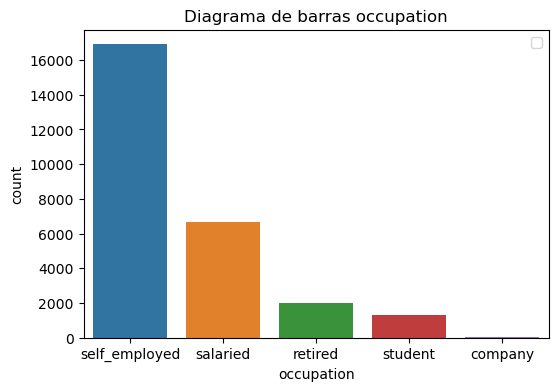

In [28]:
fig, axs    =   plt.subplots(1,1,figsize=(6,4))

columna =   "occupation"


sns.barplot(df_occupation,x=columna,y="count", ax=axs)
plt.title(f"Diagrama de barras {columna}")

axs.legend()
plt.show()

debido a que los datos NaN son 80, se procede a eliminar esas columnas

In [29]:
df = df.dropna(subset=["occupation"])


## City

In [30]:
df = df.dropna(subset=["city"])

In [31]:
df_city   =   df.city.value_counts().reset_index()
df_city

,city,count
0,1020.0,3253
1,1096.0,1908
2,409.0,1254
3,146.0,1221
4,834.0,1066
...,...,...
1568,121.0,1
1569,748.0,1
1570,1099.0,1
1571,108.0,1


In [32]:
def is_int(valor):
    if float(valor)    ==   int(valor):
        return True
    else:
        return False

df["city"].apply(is_int).value_counts()

city
True    26135
Name: count, dtype: int64

Se observa que todos los valores de city son valores enteros y no existe algun flotante en esta columna

## customer_nw_category

In [33]:
df.customer_nw_category.value_counts().reset_index()

,customer_nw_category,count
0,2,13374
1,3,9387
2,1,3374


## branch_code

In [34]:
df.branch_code.dtypes

dtype('int64')

In [35]:
df.branch_code.value_counts().sort_index().reset_index()

,branch_code,count
0,1,86
1,2,69
2,3,79
3,4,47
4,5,77
...,...,...
3133,4724,1
3134,4737,1
3135,4753,1
3136,4764,1


c:\Users\herna\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


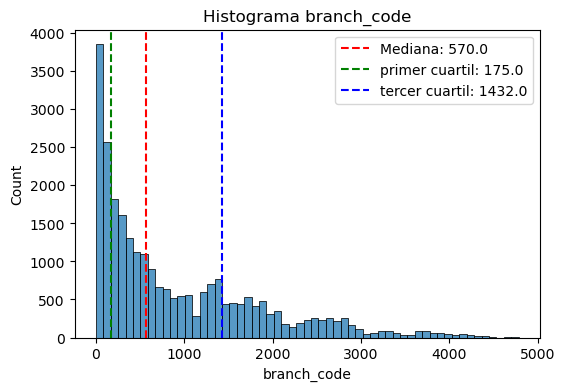

In [36]:
fig, axs    =   plt.subplots(1,1,figsize=(6,4))

columna =   "branch_code"
primer_q    =   np.quantile(df[columna],0.25)
mediana     =   np.quantile(df[columna],0.5)
tercer_q    =   np.quantile(df[columna],0.75)


sns.histplot(df,x=columna, ax=axs)
plt.title(f"Histograma {columna}")
axs.axvline(mediana, color='red', linestyle='--', label=f'Mediana: {mediana}')
axs.axvline(primer_q, color='green', linestyle='--', label=f'primer cuartil: {primer_q}')
axs.axvline(tercer_q, color='blue', linestyle='--', label=f'tercer cuartil: {tercer_q}')
axs.legend()
plt.show()

Branch_code represeta una distribucion asimetrica positiva,esto debido que los clientes se encuentran asociados entre las primeras sucursales, a excepcion de las sucursales que se presentan en la posicion del tercer cuartil

## current_balance y previous_month_end_balance

In [37]:
df[["current_balance"]].sort_values("current_balance")

,current_balance
12608,-5503.96
1375,-5213.02
22546,-4570.80
1976,-3786.47
18657,-3244.36
...,...
16822,576607.04
5688,583534.68
28249,815323.98
12712,1001960.31


In [38]:
df[["previous_month_end_balance"]].sort_values("previous_month_end_balance")

,previous_month_end_balance
16179,-3145.38
15201,-2998.64
11833,-2178.74
28336,-1980.92
24010,-1453.06
...,...
13854,692060.83
17560,898976.76
28249,957743.74
12712,1001088.10


c:\Users\herna\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\herna\anaconda3\envs\myenv\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\herna\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\herna\anaconda3\envs\myenv\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


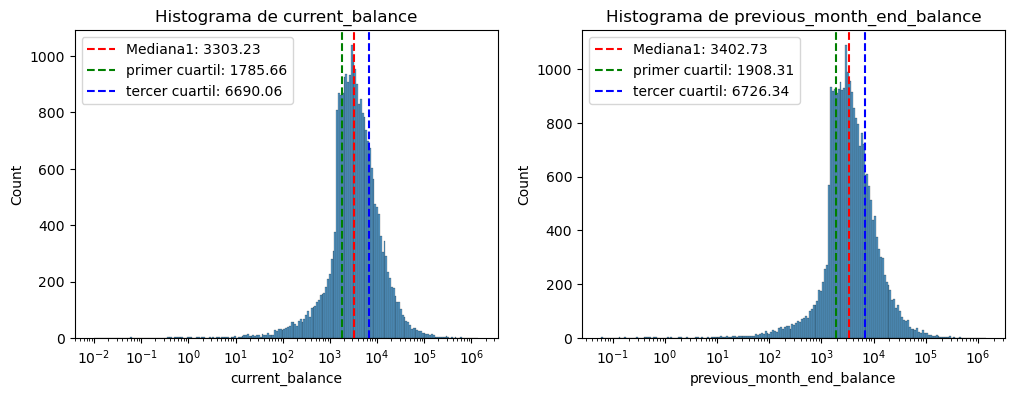

In [39]:
fig, axs    =   plt.subplots(1,2,figsize=(12,4))

columna1 =   "current_balance"
columna2 =   "previous_month_end_balance"

primer_q1    =   round(np.quantile(df[columna1],0.25),2)
mediana1     =   round(np.quantile(df[columna1],0.5),2)
tercer_q1    =   round(np.quantile(df[columna1],0.75),2)

primer_q2    =   round(np.quantile(df[columna2],0.25),2)
mediana2     =   round(np.quantile(df[columna2],0.5),2)
tercer_q2    =   round(np.quantile(df[columna2],0.75),2)

sns.histplot(df,x=columna1,log_scale=True, ax=axs[0])

axs[0].set_title(f"Histograma de {columna1}")
axs[0].axvline(mediana1, color='red', linestyle='--', label=f'Mediana1: {mediana1}')
axs[0].axvline(primer_q1, color='green', linestyle='--', label=f'primer cuartil: {primer_q1}')
axs[0].axvline(tercer_q1, color='blue', linestyle='--', label=f'tercer cuartil: {tercer_q1}')
axs[0].legend()

sns.histplot(df,x=columna2,log_scale=True, ax=axs[1])
axs[1].set_title(f"Histograma de {columna2}")
axs[1].axvline(mediana2, color='red', linestyle='--', label=f'Mediana1: {mediana2}')
axs[1].axvline(primer_q2, color='green', linestyle='--', label=f'primer cuartil: {primer_q2}')
axs[1].axvline(tercer_q2, color='blue', linestyle='--', label=f'tercer cuartil: {tercer_q2}')
axs[1].legend()
plt.show()

Se presenta valores muy altos en donde llegan terner el orden de 10**5, teniendo en consideracion que le valor de la mediana es de 3266

## average_monthly_balance_prevQ y average_monthly_balance_prevQ2

In [40]:
df[["average_monthly_balance_prevQ"]].sort_values("average_monthly_balance_prevQ")

,average_monthly_balance_prevQ
7621,1428.69
4984,1428.73
13131,1428.76
6386,1428.78
21596,1428.79
...,...
17560,758715.17
5293,850880.11
28249,904711.72
12712,1192704.04


In [41]:
df[["average_monthly_balance_prevQ2"]].sort_values("average_monthly_balance_prevQ2")

,average_monthly_balance_prevQ2
8914,-16506.10
22546,-10691.93
24332,-9746.82
8738,-7209.85
9074,-5714.08
...,...
27051,456361.44
17731,744716.66
21214,749638.99
17560,856596.51


c:\Users\herna\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\herna\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\herna\anaconda3\envs\myenv\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


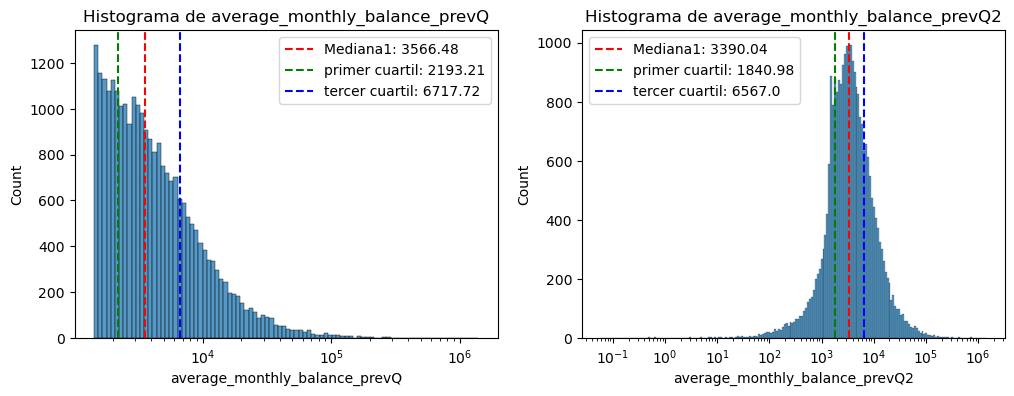

In [42]:
fig, axs    =   plt.subplots(1,2,figsize=(12,4))

columna1 =   "average_monthly_balance_prevQ"
columna2 =   "average_monthly_balance_prevQ2"

primer_q1    =   round(np.quantile(df[columna1],0.25),2)
mediana1     =   round(np.quantile(df[columna1],0.5),2)
tercer_q1    =   round(np.quantile(df[columna1],0.75),2)

primer_q2    =   round(np.quantile(df[columna2],0.25),2)
mediana2     =   round(np.quantile(df[columna2],0.5),2)
tercer_q2    =   round(np.quantile(df[columna2],0.75),2)

sns.histplot(df,x=columna1,log_scale=True, ax=axs[0])

axs[0].set_title(f"Histograma de {columna1}")
axs[0].axvline(mediana1, color='red', linestyle='--', label=f'Mediana1: {mediana1}')
axs[0].axvline(primer_q1, color='green', linestyle='--', label=f'primer cuartil: {primer_q1}')
axs[0].axvline(tercer_q1, color='blue', linestyle='--', label=f'tercer cuartil: {tercer_q1}')
axs[0].legend()

sns.histplot(df,x=columna2,log_scale=True, ax=axs[1])
axs[1].set_title(f"Histograma de {columna2}")
axs[1].axvline(mediana2, color='red', linestyle='--', label=f'Mediana1: {mediana2}')
axs[1].axvline(primer_q2, color='green', linestyle='--', label=f'primer cuartil: {primer_q2}')
axs[1].axvline(tercer_q2, color='blue', linestyle='--', label=f'tercer cuartil: {tercer_q2}')
axs[1].legend()
plt.show()

## current_month_credit and previous_month_credit

In [43]:
df[["current_month_credit"]].sort_values("current_month_credit")

,current_month_credit
13860,0.01
18943,0.01
14310,0.01
17210,0.01
17201,0.01
...,...
1817,858432.89
12218,1383300.84
7787,1476976.45
13012,1764285.97


In [44]:
df[["previous_month_credit"]].sort_values("previous_month_credit")

,previous_month_credit
19069,0.01
6885,0.01
10088,0.01
25214,0.01
27630,0.01
...,...
24055,865714.43
5637,1413436.47
9493,1447086.21
12218,1971436.45


c:\Users\herna\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\herna\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


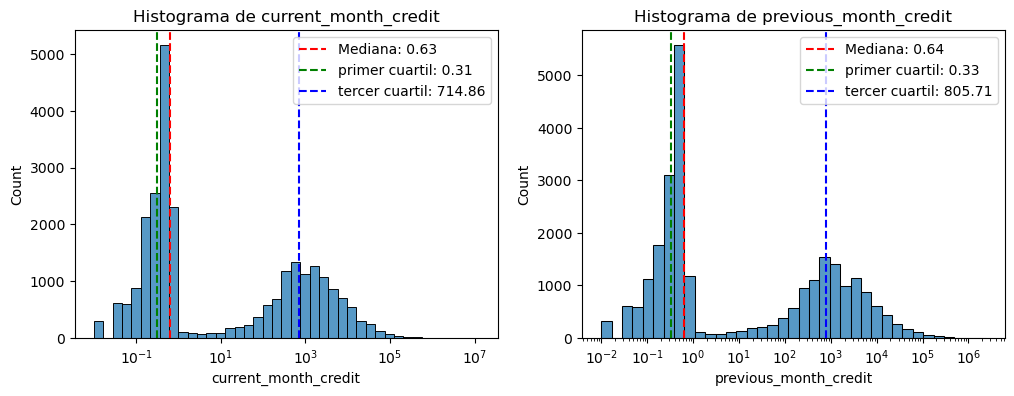

In [45]:
fig, axs    =   plt.subplots(1,2,figsize=(12,4))

columna1 =   "current_month_credit"
columna2 =   "previous_month_credit"

primer_q1    =   round(np.quantile(df[columna1],0.25),2)
mediana1     =   round(np.quantile(df[columna1],0.5),2)
tercer_q1    =   round(np.quantile(df[columna1],0.75),2)

primer_q2    =   round(np.quantile(df[columna2],0.25),2)
mediana2     =   round(np.quantile(df[columna2],0.5),2)
tercer_q2    =   round(np.quantile(df[columna2],0.75),2)

sns.histplot(df,x=columna1,log_scale=True, ax=axs[0])

axs[0].set_title(f"Histograma de {columna1}")
axs[0].axvline(mediana1, color='red', linestyle='--', label=f'Mediana: {mediana1}')
axs[0].axvline(primer_q1, color='green', linestyle='--', label=f'primer cuartil: {primer_q1}')
axs[0].axvline(tercer_q1, color='blue', linestyle='--', label=f'tercer cuartil: {tercer_q1}')
axs[0].legend()

sns.histplot(df,x=columna2,log_scale=True, ax=axs[1])
axs[1].set_title(f"Histograma de {columna2}")
axs[1].axvline(mediana2, color='red', linestyle='--', label=f'Mediana: {mediana2}')
axs[1].axvline(primer_q2, color='green', linestyle='--', label=f'primer cuartil: {primer_q2}')
axs[1].axvline(tercer_q2, color='blue', linestyle='--', label=f'tercer cuartil: {tercer_q2}')
axs[1].legend()
plt.show()

## current_month_debit y previous_month_debit

In [46]:
df[["current_month_debit"]].sort_values("current_month_debit")

,current_month_debit
10032,0.01
6583,0.01
819,0.01
2265,0.01
8240,0.01
...,...
1817,862469.01
22755,871541.78
18023,1337277.36
13012,1764285.97


In [47]:
df[["previous_month_debit"]].sort_values("previous_month_debit")

,previous_month_debit
11311,0.01
18309,0.01
16182,0.01
22579,0.01
18316,0.01
...,...
7637,775453.50
1817,837476.76
7787,1159958.76
9493,1363197.64


c:\Users\herna\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\herna\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


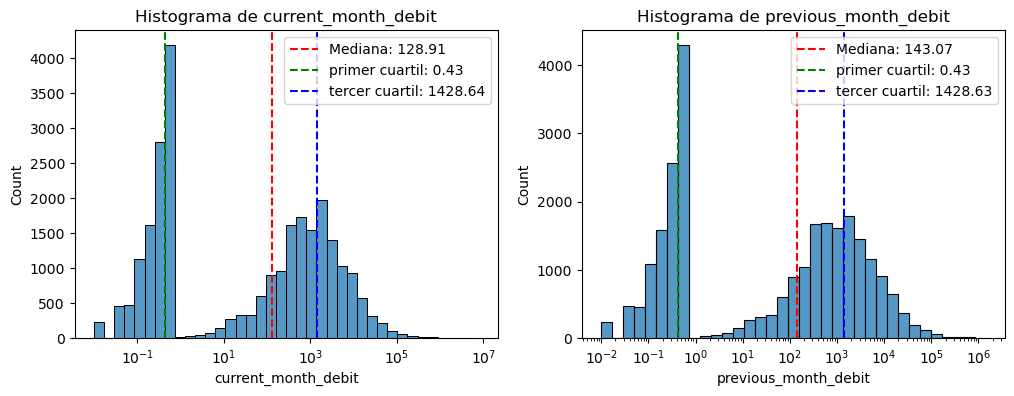

In [48]:
fig, axs    =   plt.subplots(1,2,figsize=(12,4))

columna1 =   "current_month_debit"
columna2 =   "previous_month_debit"

primer_q1    =   round(np.quantile(df[columna1],0.25),2)
mediana1     =   round(np.quantile(df[columna1],0.5),2)
tercer_q1    =   round(np.quantile(df[columna1],0.75),2)

primer_q2    =   round(np.quantile(df[columna2],0.25),2)
mediana2     =   round(np.quantile(df[columna2],0.5),2)
tercer_q2    =   round(np.quantile(df[columna2],0.75),2)

sns.histplot(df,x=columna1,log_scale=True, ax=axs[0])

axs[0].set_title(f"Histograma de {columna1}")
axs[0].axvline(mediana1, color='red', linestyle='--', label=f'Mediana: {mediana1}')
axs[0].axvline(primer_q1, color='green', linestyle='--', label=f'primer cuartil: {primer_q1}')
axs[0].axvline(tercer_q1, color='blue', linestyle='--', label=f'tercer cuartil: {tercer_q1}')
axs[0].legend()

sns.histplot(df,x=columna2,log_scale=True, ax=axs[1])
axs[1].set_title(f"Histograma de {columna2}")
axs[1].axvline(mediana2, color='red', linestyle='--', label=f'Mediana: {mediana2}')
axs[1].axvline(primer_q2, color='green', linestyle='--', label=f'primer cuartil: {primer_q2}')
axs[1].axvline(tercer_q2, color='blue', linestyle='--', label=f'tercer cuartil: {tercer_q2}')
axs[1].legend()
plt.show()

## current_month_balance y previous_month_balance

In [49]:
df[["current_month_balance"]].sort_values("current_month_balance")

,current_month_balance
1375,-3374.18
11833,-2227.29
24010,-1505.51
18657,-848.96
3426,-598.69
...,...
17560,478192.00
15841,499582.32
28249,880628.04
12712,1001725.71


In [50]:
df[["previous_month_balance"]].sort_values("previous_month_balance")

,previous_month_balance
19978,-5171.92
15201,-3060.13
11833,-1696.24
14296,-337.52
14354,0.06
...,...
28249,898246.69
17560,898976.76
5293,976937.69
12712,1326486.64


c:\Users\herna\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\herna\anaconda3\envs\myenv\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\herna\anaconda3\envs\myenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\herna\anaconda3\envs\myenv\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


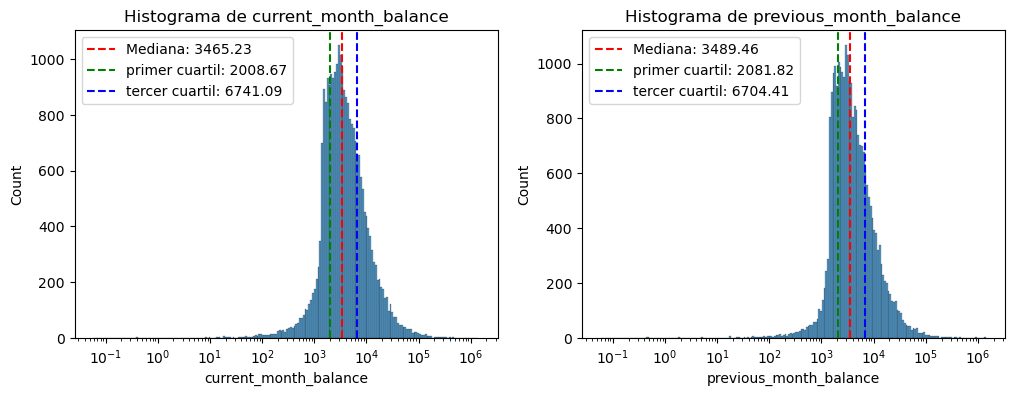

In [51]:
fig, axs    =   plt.subplots(1,2,figsize=(12,4))

columna1 =   "current_month_balance"
columna2 =   "previous_month_balance"

primer_q1    =   round(np.quantile(df[columna1],0.25),2)
mediana1     =   round(np.quantile(df[columna1],0.5),2)
tercer_q1    =   round(np.quantile(df[columna1],0.75),2)

primer_q2    =   round(np.quantile(df[columna2],0.25),2)
mediana2     =   round(np.quantile(df[columna2],0.5),2)
tercer_q2    =   round(np.quantile(df[columna2],0.75),2)

sns.histplot(df,x=columna1,log_scale=True, ax=axs[0])

axs[0].set_title(f"Histograma de {columna1}")
axs[0].axvline(mediana1, color='red', linestyle='--', label=f'Mediana: {mediana1}')
axs[0].axvline(primer_q1, color='green', linestyle='--', label=f'primer cuartil: {primer_q1}')
axs[0].axvline(tercer_q1, color='blue', linestyle='--', label=f'tercer cuartil: {tercer_q1}')
axs[0].legend()

sns.histplot(df,x=columna2,log_scale=True, ax=axs[1])
axs[1].set_title(f"Histograma de {columna2}")
axs[1].axvline(mediana2, color='red', linestyle='--', label=f'Mediana: {mediana2}')
axs[1].axvline(primer_q2, color='green', linestyle='--', label=f'primer cuartil: {primer_q2}')
axs[1].axvline(tercer_q2, color='blue', linestyle='--', label=f'tercer cuartil: {tercer_q2}')
axs[1].legend()
plt.show()

## churn

In [52]:
df_churn                =   df[["churn"]].value_counts().reset_index()
df_churn_por            =   round(df_churn[["count"]] / sum(df_churn["count"])    *   100,2)
df_churn["porcentaje"]  =   df_churn_por.values
df_churn

,churn,count,porcentaje
0,0,21262,81.35
1,1,4873,18.65


mas del 18% de los clienets decide ya no continuar en el mismo banco

## last_transaction

In [53]:
df[["last_transaction"]].sort_values("last_transaction")

,last_transaction
25497,2018-12-31
1521,2018-12-31
2036,2018-12-31
17479,2019-01-01
18468,2019-01-01
...,...
19266,NaT
4007,NaT
19251,NaT
3979,NaT


In [54]:
df[df["last_transaction"]=="NaT"]

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction,dependientes_cat
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT,Sin familia
15,17,1516,51,Female,0.0,self_employed,1232.0,3,149,2010.98,...,2415.57,0.16,0.16,128.66,360.70,1960.91,1840.23,0,NaT,Sin familia
21,24,2440,29,Female,0.0,self_employed,1020.0,2,1106,4792.60,...,4826.60,0.47,0.47,357.61,786.19,5029.05,5744.21,1,NaT,Sin familia
25,28,2271,76,Male,0.0,self_employed,1533.0,3,881,14289.26,...,14443.43,0.64,0.64,0.64,0.64,14289.26,14289.26,0,NaT,Sin familia
29,32,2060,33,Female,0.0,salaried,834.0,2,14,6152.67,...,6156.28,0.11,0.11,0.11,0.11,6152.98,6165.44,0,NaT,Sin familia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28363,30283,1806,26,Female,0.0,student,334.0,2,82,7422.94,...,7375.91,0.01,0.01,0.01,0.01,7422.94,7422.94,0,NaT,Sin familia
28364,30284,1704,72,Male,0.0,self_employed,656.0,2,1964,3453.68,...,3615.19,0.44,0.44,0.44,214.73,3453.68,3540.40,0,NaT,Sin familia
28365,30285,2188,35,Male,0.0,self_employed,223.0,2,187,2321.35,...,3212.75,0.56,0.56,214.84,0.56,2454.36,2535.64,0,NaT,Sin familia
28376,30296,2300,85,Male,0.0,retired,1589.0,2,389,1741.50,...,1730.46,0.04,0.04,0.04,0.04,1741.50,1741.50,0,NaT,Sin familia


# Vsualizacion de los datos

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26135 entries, 0 to 28381
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     26135 non-null  int64  
 1   vintage                         26135 non-null  int64  
 2   age                             26135 non-null  int64  
 3   gender                          26135 non-null  object 
 4   dependents                      26135 non-null  float64
 5   occupation                      26135 non-null  object 
 6   city                            26135 non-null  float64
 7   customer_nw_category            26135 non-null  int64  
 8   branch_code                     26135 non-null  int64  
 9   current_balance                 26135 non-null  float64
 10  previous_month_end_balance      26135 non-null  float64
 11  average_monthly_balance_prevQ   26135 non-null  float64
 12  average_monthly_balance_prevQ2  26135

In [56]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction,dependientes_cat
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21,Sin familia
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT,Sin familia
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03,Con familia
5,7,1923,42,Female,0.0,self_employed,1096.0,2,1666,15202.20,...,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0,2019-11-01,Sin familia
6,8,2048,72,Male,0.0,retired,1020.0,1,1,7006.93,...,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0,2019-09-24,Sin familia


In [57]:
round(df.describe(),2)

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,26135.00,26135.0,26135.00,26135.00,26135.00,26135.00,26135.00,26135.00,26135.00,26135.00,26135.00,26135.00,26135.00,26135.00,26135.00,26135.00,26135.00,26135.00
mean,15148.39,2090.3,48.49,0.33,795.95,2.23,924.96,6948.79,7062.04,7072.37,6641.38,3424.63,3296.24,3595.53,3320.48,7000.49,7082.82,0.19
std,8749.37,274.0,15.98,0.81,432.97,0.66,941.55,19849.94,20733.77,19837.60,18060.84,79640.98,30108.85,52608.46,23355.55,19283.23,21242.40,0.39
min,1.00,73.0,18.00,0.00,0.00,1.00,1.00,-5503.96,-3145.38,1428.69,-16506.10,0.01,0.01,0.01,0.01,-3374.18,-5171.92,0.00
25%,7544.50,1957.0,36.00,0.00,409.00,2.00,175.00,1785.66,1908.31,2193.21,1840.98,0.31,0.33,0.43,0.43,2008.67,2081.82,0.00
50%,15160.00,2154.0,46.00,0.00,834.00,2.00,570.00,3303.23,3402.73,3566.48,3390.04,0.63,0.64,128.91,143.07,3465.23,3489.46,0.00
75%,22722.50,2292.0,60.00,0.00,1096.00,3.00,1432.00,6690.06,6726.34,6717.72,6567.00,714.86,805.71,1428.64,1428.63,6741.09,6704.41,0.00
max,30301.00,2476.0,90.00,9.00,1649.00,3.00,4782.00,1398486.42,1398486.42,1398486.42,1389626.93,12269845.39,2361808.29,7637857.36,1414168.06,1398486.42,1398486.42,1.00


In [58]:
df_1 = df[["gender","churn"]].value_counts().reset_index()
totals = df_1.groupby('gender')['count'].sum().reset_index(name='total')
df_1 = pd.merge(df_1, totals, on='gender')
df_1['porcentajes'] = round((df_1['count'] / df_1['total']) * 100,2)
df_1 = df_1[['gender', 'churn', 'count', 'porcentajes']]
df_1

,gender,churn,count,porcentajes
0,Male,0,12523,80.67
1,Female,0,8739,82.36
2,Male,1,3001,19.33
3,Female,1,1872,17.64


In [59]:
df_11 = df_1.groupby('gender')["count"].sum().reset_index()
df_11

,gender,count
0,Female,10611
1,Male,15524


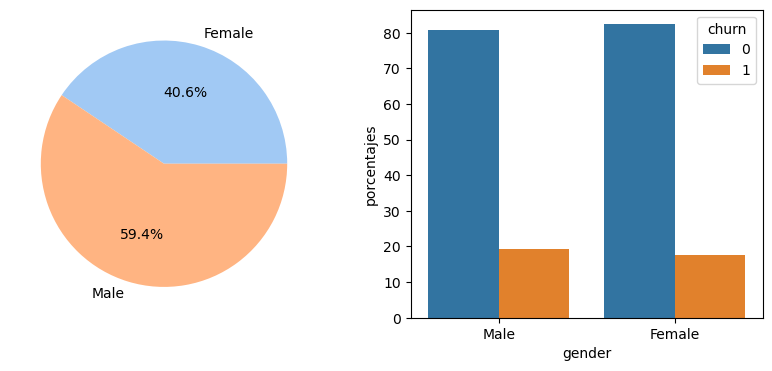

In [60]:
colors = sns.color_palette("pastel")

fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].pie(df_11["count"], labels=df_11["gender"], autopct='%1.1f%%',colors=colors)
sns.barplot(df_1,x="gender",y="porcentajes",hue="churn")
plt.show()

La relacion entre hombres y mujeres es approximado de 3 a 2 como se muestra en la grafica de Pie, con respectos a la grafica de barras, esta esta en funcion de los porcentajes, aqui podemos ver que existe la misma proporcion entre hombres y mujeres que abandonan la actividad bancaria


In [61]:
df_2 =  df[["dependientes_cat","churn"]].value_counts().reset_index()
totals_2 = df_2.groupby('dependientes_cat')['count'].sum().reset_index(name='total')
df_2 = pd.merge(df_2, totals_2, on='dependientes_cat')
df_2['porcentajes'] = round((df_2['count'] / df_2['total']) * 100,2)
df_2 = df_2[['dependientes_cat', 'churn', 'count', 'porcentajes']]
df_2

,dependientes_cat,churn,count,porcentajes
0,Sin familia,0,17870,82.04
1,Sin familia,1,3912,17.96
2,Con familia,0,3392,77.92
3,Con familia,1,961,22.08


In [62]:
df_21 = df_2.groupby('dependientes_cat')["count"].sum().reset_index()
df_21

,dependientes_cat,count
0,Con familia,4353
1,Sin familia,21782


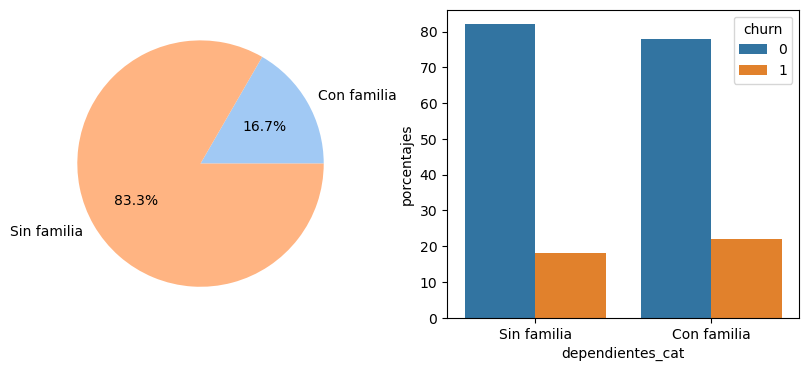

In [63]:

fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].pie(df_21["count"], labels=df_21["dependientes_cat"], autopct='%1.1f%%',colors=colors)
sns.barplot(df_2,x="dependientes_cat",y="porcentajes",hue="churn")
plt.show()

La relacion entre las personas que estan solteras y las personas que tienen una familia por mantener es de aproximadamente de 4 a 1, en donde de estos grupos su relacion de las personas que deciden cambiar de banco y las que se mantienen en el mismo, siguen teniendo la misma proporcion

In [64]:
df_3 =  df[["occupation","churn"]].value_counts().reset_index()
totals_3 = df_3.groupby('occupation')['count'].sum().reset_index(name='total')
df_3 = pd.merge(df_3, totals_3, on='occupation')
df_3['porcentajes'] = round((df_3['count'] / df_3['total']) * 100,2)
df_3 = df_3[['occupation', 'churn', 'count', 'porcentajes']]
df_3

,occupation,churn,count,porcentajes
0,self_employed,0,13172,80.17
1,salaried,0,5365,83.00
2,self_employed,1,3258,19.83
3,retired,0,1659,85.25
4,salaried,1,1099,17.00
5,student,0,1039,82.13
6,retired,1,287,14.75
7,student,1,226,17.87
8,company,0,27,90.00
9,company,1,3,10.00


In [65]:
df_31 = df_3.groupby('occupation')["count"].sum().reset_index()
df_31

,occupation,count
0,company,30
1,retired,1946
2,salaried,6464
3,self_employed,16430
4,student,1265


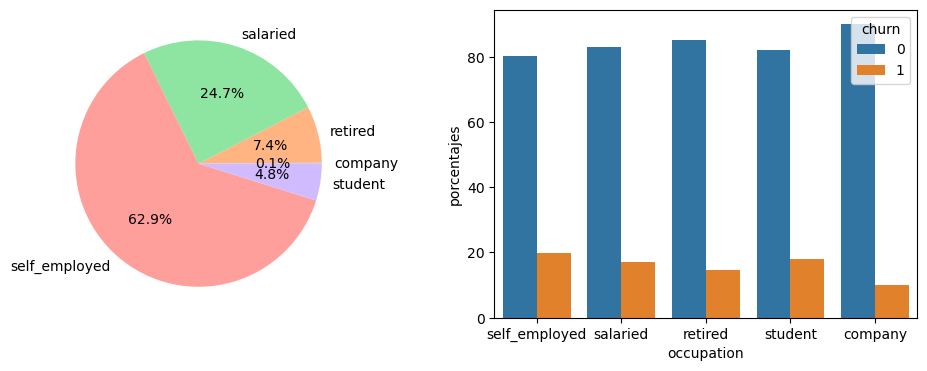

In [66]:

fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].pie(df_31["count"], labels=df_31["occupation"], autopct='%1.1f%%',colors=colors)
sns.barplot(df_3,x="occupation",y="porcentajes",hue="churn")
plt.show()

In [67]:
df_4 =  df[["customer_nw_category","churn"]].value_counts().reset_index()
totals_4 = df_4.groupby('customer_nw_category')['count'].sum().reset_index(name='total')
df_4 = pd.merge(df_4, totals_4, on='customer_nw_category')
df_4['porcentajes'] = round((df_4['count'] / df_4['total']) * 100,2)
df_4 = df_4[['customer_nw_category', 'churn', 'count', 'porcentajes']]

df_41 = df_4.groupby('customer_nw_category')["count"].sum().reset_index()

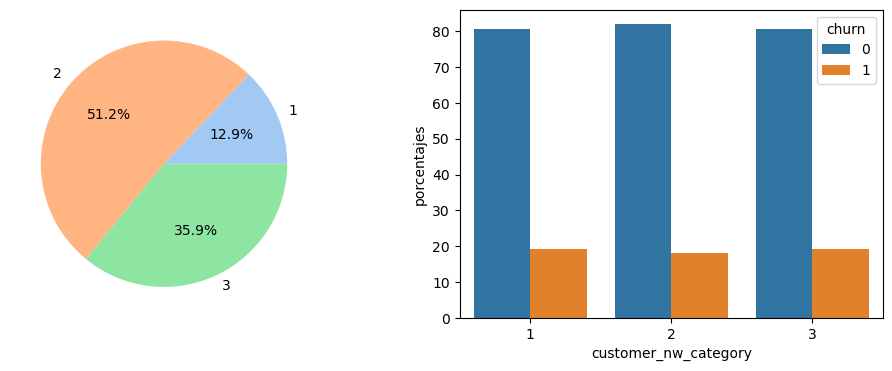

In [68]:

fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].pie(df_41["count"], labels=df_41["customer_nw_category"], autopct='%1.1f%%',colors=colors)
sns.barplot(df_4,x="customer_nw_category",y="porcentajes",hue="churn")
plt.show()

In [69]:
df_mod = df[df.columns[range(9,20)]]
df_mod

,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
2,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
4,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
5,15202.20,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
6,7006.93,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
...,...,...,...,...,...,...,...,...,...,...,...
28376,1741.50,1741.50,1741.50,1730.46,0.04,0.04,0.04,0.04,1741.50,1741.50,0
28378,3844.10,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
28379,65511.97,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1
28380,1625.55,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0


Text(0.5, 1.0, 'Diagrama de correlacion')

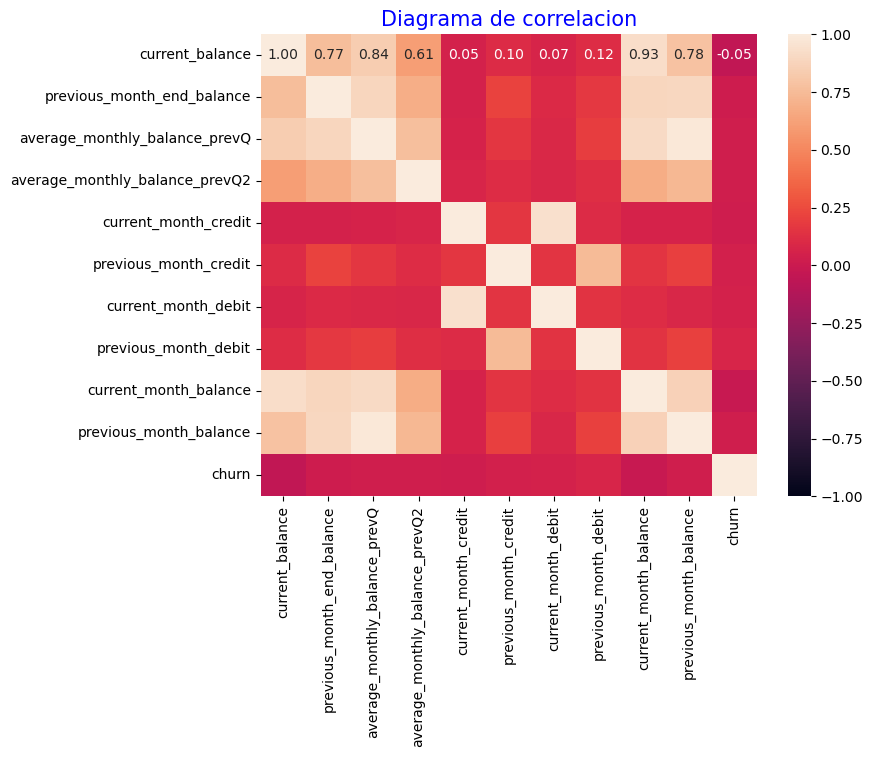

In [70]:
plt.figure(figsize=(8,6))
sns.heatmap(df_mod.corr(), annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.title("Diagrama de correlacion", fontsize=15, color="blue")

In [71]:
pip install nbformat --upgrade


Note: you may need to restart the kernel to use updated packages.


In [72]:
"""import plotly.express as px
fig = px.scatter_3d(df_mod, x='previous_month_end_balance', y='average_monthly_balance_prevQ',
                     z='average_monthly_balance_prevQ2',
              color='churn')
fig.show()"""

"import plotly.express as px\nfig = px.scatter_3d(df_mod, x='previous_month_end_balance', y='average_monthly_balance_prevQ',\n                     z='average_monthly_balance_prevQ2',\n              color='churn')\nfig.show()"

In [73]:
df_mod_2=df.iloc[:,[3,21,7,5,19]]

In [74]:
"""fig = px.parallel_categories(df_mod_2, color="churn", color_continuous_scale=px.colors.sequential.Inferno)
fig.show()"""

'fig = px.parallel_categories(df_mod_2, color="churn", color_continuous_scale=px.colors.sequential.Inferno)\nfig.show()'

In [75]:
df.dtypes.reset_index()

,index,0
0,customer_id,int64
1,vintage,int64
2,age,int64
3,gender,object
4,dependents,float64
5,occupation,object
6,city,float64
7,customer_nw_category,int64
8,branch_code,int64
9,current_balance,float64


In [76]:
df.describe().T.reset_index()

,index,count,mean,std,min,25%,50%,75%,max
0,customer_id,26135.0,15148.392921,8749.374639,1.00,7544.500,15160.00,22722.500,30301.00
1,vintage,26135.0,2090.300440,274.001357,73.00,1957.000,2154.00,2292.000,2476.00
2,age,26135.0,48.490606,15.982922,18.00,36.000,46.00,60.000,90.00
3,dependents,26135.0,0.327148,0.814813,0.00,0.000,0.00,0.000,9.00
4,city,26135.0,795.946355,432.973296,0.00,409.000,834.00,1096.000,1649.00
5,customer_nw_category,26135.0,2.230075,0.659814,1.00,2.000,2.00,3.000,3.00
6,branch_code,26135.0,924.958829,941.546417,1.00,175.000,570.00,1432.000,4782.00
7,current_balance,26135.0,6948.785959,19849.944924,-5503.96,1785.655,3303.23,6690.060,1398486.42
8,previous_month_end_balance,26135.0,7062.043938,20733.769316,-3145.38,1908.310,3402.73,6726.345,1398486.42
9,average_monthly_balance_prevQ,26135.0,7072.374154,19837.598898,1428.69,2193.210,3566.48,6717.720,1398486.42


In [77]:
df.describe(include="object").T.reset_index()

,index,count,unique,top,freq
0,gender,26135,2,Male,15524
1,occupation,26135,5,self_employed,16430
2,last_transaction,26135,358,NaT,2740
3,dependientes_cat,26135,2,Sin familia,21782


# Preprocesamiento

In [78]:
df_dl = df[:]

In [79]:
columnas_n  =   ["current_balance","previous_month_end_balance","average_monthly_balance_prevQ2",
                "current_month_balance","previous_month_balance"]

columnas_sn    =   ["average_monthly_balance_prevQ","vintage","current_month_credit","previous_month_credit","current_month_debit","previous_month_debit"]


In [80]:
df_dl_norm_1  =   df_dl[columnas_n]
for col in df_dl_norm_1.columns:
    shift_value = np.abs(df_dl_norm_1[col].min()) + 1
    df_dl_norm_1[col] = df_dl_norm_1[col] + shift_value

C:\Users\herna\AppData\Local\Temp\ipykernel_11244\1843211863.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dl_norm_1[col] = df_dl_norm_1[col] + shift_value


In [81]:
df_dl_norm_2 = df_dl_norm_1.join(df_dl[columnas_sn])


### Transformacion logaritmica

In [82]:
df_dl_norm_2 = np.log(df_dl_norm_2)

In [83]:
df_dl.drop(columns=columnas_n, inplace=True)
df_dl.drop(columns=columnas_sn, inplace=True)

df_dl = df_dl.join(df_dl_norm_2)

C:\Users\herna\AppData\Local\Temp\ipykernel_11244\3991290819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dl.drop(columns=columnas_n, inplace=True)
C:\Users\herna\AppData\Local\Temp\ipykernel_11244\3991290819.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dl.drop(columns=columnas_sn, inplace=True)


In [84]:
df_dl.drop(columns=["last_transaction"], inplace=True)
X=df_dl.drop(columns=["customer_nw_category","churn"])
y=df_dl[["churn"]]

In [85]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler



In [86]:
df.head(3)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction,dependientes_cat
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21,Sin familia
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT,Sin familia
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03,Con familia


In [87]:
numeric_features = ["vintage","age","city","branch_code","current_balance",
                    "previous_month_end_balance","average_monthly_balance_prevQ","average_monthly_balance_prevQ2",
                    "current_month_credit","previous_month_credit","current_month_debit","previous_month_debit",
                    "current_month_balance","previous_month_balance"]

nominal_feature = ["gender","occupation","dependientes_cat"]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])



nominal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('nom', nominal_transformer, nominal_feature)
    ]
)

df_processed = preprocessor.fit_transform(X)

df_processed = pd.DataFrame(df_processed, columns=numeric_features + preprocessor.named_transformers_['nom']['onehot'].get_feature_names_out(nominal_feature).tolist())

print(df_processed.head())

    vintage       age      city  branch_code  current_balance  \
0  0.953396  0.666667  0.113402     0.157708         0.625120   
1  0.965687  0.180556  0.088539     0.008366         0.646450   
2  0.872344  0.333333  0.906004     0.080945         0.619516   
3  0.928274  0.333333  0.664645     0.348254         0.702109   
4  0.946145  0.750000  0.618557     0.000000         0.666517   

   previous_month_end_balance  average_monthly_balance_prevQ  \
0                    0.595975                       0.003020   
1                    0.643017                       0.179274   
2                    0.595095                       0.020323   
3                    0.696874                       0.343472   
4                    0.656596                       0.247589   

   average_monthly_balance_prevQ2  current_month_credit  \
0                        0.691964              0.143146   
1                        0.697147              0.196431   
2                        0.693605              

In [88]:
df_processed["customer_nw_category"]    =   df_dl["customer_nw_category"].values

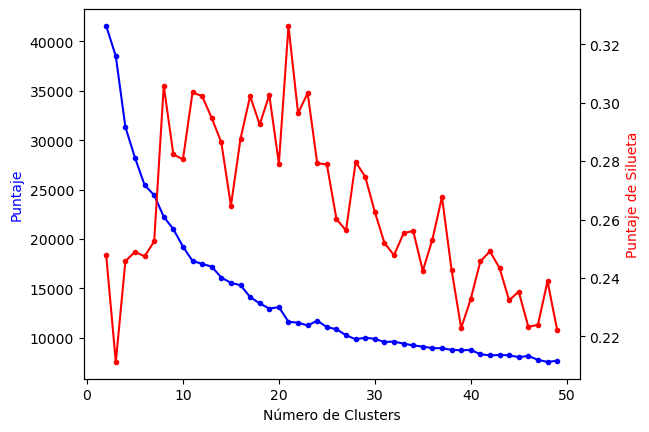

In [89]:
score = []
score_1=[]

k_clusters = range(2,50) # Este range va de 2 a 20
for k in k_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_processed)
    score.append(-kmeans.score(df_processed))
    score_1.append(silhouette_score(df_processed, kmeans.labels_))

fig, ax1 = plt.subplots()

ax1.plot(k_clusters, score, 'b.-')
ax1.set_xlabel('Número de Clusters')
ax1.set_ylabel('Puntaje', color='b')

ax2 = ax1.twinx()
ax2.plot(k_clusters, score_1, 'r.-')
ax2.set_ylabel('Puntaje de Silueta', color='r')
plt.show()

In [90]:
k_clusters = 16

kmeans_n = KMeans(n_clusters=k_clusters)
kmeans_n.fit(df_processed)
clusters_numero = kmeans_n.predict(df_processed)


In [91]:
df_dl["n_Clusters"] =  clusters_numero

In [92]:
df_dl.groupby('n_Clusters').describe()

customer_id                                                      \
                 count          mean          std    min      25%      50%   
n_Clusters                                                                   
0               2342.0  15331.570026  8642.522801   19.0  7773.25  15510.0   
1               3799.0  15186.576467  8809.231605    7.0  7533.00  15235.0   
2               2134.0  15113.350047  8738.239554    4.0  7428.75  15205.0   
3               2621.0  15122.697825  8817.764357    6.0  7526.00  15157.0   
4                815.0  14723.317791  8929.120322   31.0  6772.00  14640.0   
5               2634.0  15140.612756  8815.345343   17.0  7405.25  15300.0   
6                506.0  15512.717391  9086.309889  135.0  7532.25  15019.0   
7               1373.0  15399.388201  8501.775727   32.0  8350.00  15376.0   
8                600.0  14936.428333  8888.591581   12.0  7045.75  14680.0   
9               1422.0  15172.248945  8706.651157   42.0  7770.00  14946.5   
10              3202.0  15107.144909  8618.893194    1.0  7709.25  15109.5   
11              1500.0  15014.879333  8654.760354   21.0  7728.25  14789.5   
12               985.0  15075.975635  8794.515465    8.0  7095.00  15187.0   
13               371.0  14955.506739  8854.097359   34.0  7039.00  15132.0   
14               795.0  14983.167296  8830.449152   27.0  7519.00  14820.0   
15              1036.0  15250.594595  8868.926762   61.0  7345.50  15567.0   

                                  age             ... current_month_debit  \
                 75%      max   count       mean  ...                 75%   
n_Clusters                                        ...                       
0           22844.00  30268.0  2342.0  47.127669  ...            7.135736   
1           22777.00  30298.0  3799.0  49.718873  ...            6.590679   
2           22605.25  30299.0  2134.0  44.690253  ...            7.425356   
3           22792.00  30300.0  2621.0  47.911484  ...            8.011776   
4           22451.00  30202.0   815.0  51.095706  ...            8.157718   
5           22804.75  30290.0  2634.0  47.995065  ...            6.571349   
6           23411.25  30250.0   506.0  45.924901  ...            7.562960   
7           22733.00  30291.0  1373.0  40.895120  ...            6.591413   
8           22820.50  30293.0   600.0  71.966667  ...            6.429447   
9           22831.25  30294.0  1422.0  43.327707  ...            7.190382   
10          22401.50  30295.0  3202.0  49.887258  ...            7.329753   
11          22275.75  30242.0  1500.0  49.022667  ...            7.396344   
12          22780.00  30296.0   985.0  73.276142  ...            6.571779   
13          23194.00  30266.0   371.0  71.778976  ...            6.416880   
14          22732.00  30233.0   795.0  47.394969  ...            8.038352   
15          22913.50  30301.0  1036.0  24.229730  ...            6.095272   

                      previous_month_debit                               \
                  max                count      mean       std      min   
n_Clusters                                                                
0           12.429218               2342.0  3.106220  4.264919 -4.60517   
1           14.383257               3799.0  2.604826  4.269917 -4.60517   
2           13.328215               2134.0  4.265273  4.087278 -4.60517   
3           13.191617               2621.0  5.166705  4.006833 -4.60517   
4           13.622622                815.0  4.220640  4.695160 -4.60517   
5           12.434480               2634.0  2.444229  4.188625 -4.60517   
6           11.140101                506.0  5.202147  3.629214 -4.60517   
7           13.678019               1373.0  3.222730  4.108536 -4.60517   
8           11.514589                600.0  3.025554  4.161713 -4.60517   
9           11.727593               1422.0  3.762974  4.030337 -4.60517   
10          13.667554               3202.0  3.399430  4.430299 -4.60517   
11          12

In [93]:
kmeans_n.cluster_centers_

df_dl.drop(columns='n_Clusters', inplace=True)
centroids = pd.DataFrame(kmeans_n.cluster_centers_, columns= df_processed.columns)
round(centroids.var(),3).sort_values(ascending=False)

customer_nw_category              0.445
occupation_self_employed          0.239
occupation_salaried               0.222
gender_Female                     0.210
gender_Male                       0.210
occupation_retired                0.161
dependientes_cat_Sin familia      0.155
dependientes_cat_Con familia      0.155
occupation_student                0.062
age                               0.030
current_month_debit               0.003
previous_month_debit              0.003
branch_code                       0.002
previous_month_credit             0.002
average_monthly_balance_prevQ     0.001
current_month_credit              0.001
vintage                           0.000
occupation_company                0.000
previous_month_balance            0.000
average_monthly_balance_prevQ2    0.000
previous_month_end_balance        0.000
current_balance                   0.000
city                              0.000
current_month_balance             0.000
dtype: float64

In [94]:
df["CLUSTER"]  = clusters_numero

def mode_func(x):
    return x.mode().iloc[0]

summary_cluster = df.groupby('CLUSTER').agg({
    'customer_nw_category': 'median',
    'occupation': mode_func,
    'gender': mode_func,
    'dependientes_cat': mode_func,
    'age':'median',

})

In [95]:
summary_cluster

,customer_nw_category,occupation,gender,dependientes_cat,age
CLUSTER,,,,,
0,3.0,self_employed,Male,Sin familia,45.0
1,2.0,self_employed,Female,Sin familia,47.0
2,2.0,salaried,Male,Sin familia,44.0
3,2.0,self_employed,Male,Con familia,47.0
4,1.0,self_employed,Male,Sin familia,51.0
5,3.0,self_employed,Female,Sin familia,46.0
6,3.0,salaried,Male,Con familia,45.0
7,2.0,salaried,Female,Sin familia,39.0
8,3.0,retired,Male,Sin familia,71.0


In [96]:
cantidad_cluster    =   df.CLUSTER.value_counts().sort_index()
summary_cluster["cantidad"] =   cantidad_cluster

In [97]:
summary_cluster

,customer_nw_category,occupation,gender,dependientes_cat,age,cantidad
CLUSTER,,,,,,
0,3.0,self_employed,Male,Sin familia,45.0,2342
1,2.0,self_employed,Female,Sin familia,47.0,3799
2,2.0,salaried,Male,Sin familia,44.0,2134
3,2.0,self_employed,Male,Con familia,47.0,2621
4,1.0,self_employed,Male,Sin familia,51.0,815
5,3.0,self_employed,Female,Sin familia,46.0,2634
6,3.0,salaried,Male,Con familia,45.0,506
7,2.0,salaried,Female,Sin familia,39.0,1373
8,3.0,retired,Male,Sin familia,71.0,600


# Machine Learning

In [98]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train, X_pre, y_train, y_pre = train_test_split(df_processed, y, test_size=0.3, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_pre, y_pre, test_size=0.5, stratify=y_pre)

### 1. KNN


In [112]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = [{"n_neighbors":np.arange(1,30)}
]

knn_clf = KNeighborsClassifier()

grid_search = GridSearchCV(knn_clf, param_grid, cv=5,
                           return_train_score=True)

grid_search.fit(X_train, y_train)

c:\Users\herna\anaconda3\envs\myenv\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\herna\anaconda3\envs\myenv\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\herna\anaconda3\envs\myenv\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
c:\Users\herna\anaconda3\envs\myenv\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expe

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])}],
             return_train_score=True)

In [113]:
cvres = grid_search.cv_results_
for values in zip(cvres['mean_test_score'], cvres['params']):
    print(values)

(0.7454356200720498, {'n_neighbors': 1})
(0.8032140616298316, {'n_neighbors': 2})
(0.784191559537505, {'n_neighbors': 3})
(0.805892568351949, {'n_neighbors': 4})
(0.7986222696464644, {'n_neighbors': 5})
(0.8090083380763385, {'n_neighbors': 6})
(0.8044167104607063, {'n_neighbors': 7})
(0.8102654225124922, {'n_neighbors': 8})
(0.8084069912471193, {'n_neighbors': 9})
(0.8124519915467168, {'n_neighbors': 10})
(0.8105388407681591, {'n_neighbors': 11})
(0.8117414746565125, {'n_neighbors': 12})
(0.8116319908025792, {'n_neighbors': 13})
(0.8131626429196132, {'n_neighbors': 14})
(0.8119053941157247, {'n_neighbors': 15})
(0.8131080280040781, {'n_neighbors': 16})
(0.8127252454346487, {'n_neighbors': 17})
(0.8134360312902373, {'n_neighbors': 18})
(0.8132719474632903, {'n_neighbors': 19})
(0.8136000254620563, {'n_neighbors': 20})
(0.812998678632837, {'n_neighbors': 21})
(0.8133267267465604, {'n_neighbors': 22})
(0.8132173474902766, {'n_neighbors': 23})
(0.8133814313172236, {'n_neighbors': 24})
(0.8

In [196]:
knn = KNeighborsClassifier(n_neighbors=29)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_pre)

print(f"score de prueba: {knn.score(X_train, y_train)}")
print(f"score de test: {knn.score(X_pre, y_pre)}")
print(classification_report(y_pre, y_pred_knn))

c:\Users\herna\anaconda3\envs\myenv\lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


score de prueba: 0.8148026675412704
score de test: 0.8140543298048718
              precision    recall  f1-score   support

           0       0.81      1.00      0.90      6379
           1       0.58      0.01      0.02      1462

    accuracy                           0.81      7841
   macro avg       0.70      0.50      0.46      7841
weighted avg       0.77      0.81      0.73      7841



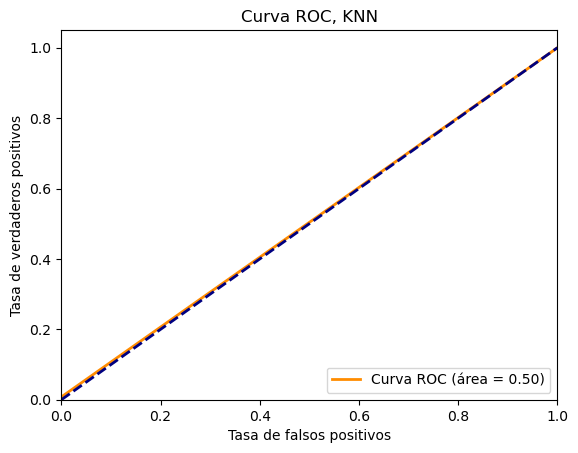

In [197]:
fpr, tpr, thresholds = roc_curve(y_pre, y_pred_knn)
roc_auc = roc_auc_score(y_pre, y_pred_knn)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC, KNN')
plt.legend(loc="lower right")
plt.show()

[[6369 1448]
 [  10   14]]


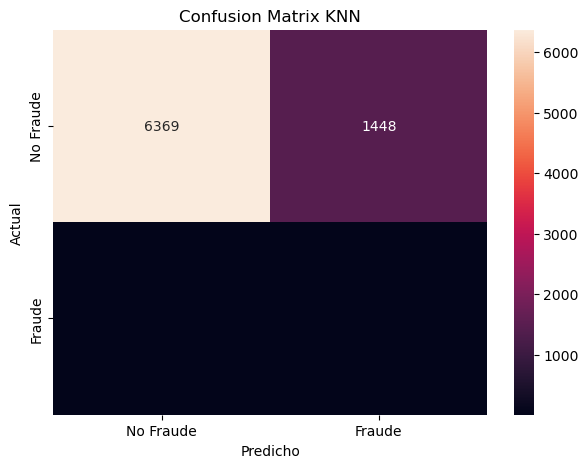

In [202]:
cm =confusion_matrix(y_pred_knn,y_pre)
print(cm)

plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['No Fraude', 'Fraude'], yticklabels=['No Fraude', 'Fraude'])
plt.xlabel('Predicho')
plt.ylabel('Actual')
plt.title('Confusion Matrix KNN')
plt.show()

### 2. Arbol de decisiones

In [115]:
from sklearn.tree import DecisionTreeClassifier

param_grid = [{"max_depth":np.arange(2,33)}
]

dtc_clf = DecisionTreeClassifier()

grid_search = GridSearchCV(dtc_clf, param_grid, cv=5,
                           return_train_score=True)

grid_search.fit(X_train, y_train)



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32])}],
             return_train_score=True)

In [116]:
cvres = grid_search.cv_results_
for values in zip(cvres['mean_test_score'], cvres['params']):
    print(values)

(0.8443750596766947, {'max_depth': 2})
(0.8485839943780258, {'max_depth': 3})
(0.8526288452524099, {'max_depth': 4})
(0.8515355308502548, {'max_depth': 5})
(0.8513171309581997, {'max_depth': 6})
(0.8485292748648412, {'max_depth': 7})
(0.8443201608532538, {'max_depth': 8})
(0.8431720671678289, {'max_depth': 9})
(0.8375416802954913, {'max_depth': 10})
(0.8320208370471723, {'max_depth': 11})
(0.8296705129214708, {'max_depth': 12})
(0.8265001880516312, {'max_depth': 13})
(0.8238762364749637, {'max_depth': 14})
(0.8210339896038903, {'max_depth': 15})
(0.8175901269382131, {'max_depth': 16})
(0.8154582176470878, {'max_depth': 17})
(0.8144742376736527, {'max_depth': 18})
(0.8097733204568647, {'max_depth': 19})
(0.808843716318623, {'max_depth': 20})
(0.805181767553839, {'max_depth': 21})
(0.8042524323809819, {'max_depth': 22})
(0.8054004065262358, {'max_depth': 23})
(0.8022297529209267, {'max_depth': 24})
(0.8005352709998086, {'max_depth': 25})
(0.7984580065092611, {'max_depth': 26})
(0.7965447

In [193]:
dt_clf=DecisionTreeClassifier(max_depth=4)
dt_clf.fit(X_train, y_train)
y_pred_dt=dt_clf.predict(X_pre)

print(f"score de prueba: {dt_clf.score(X_train, y_train)}")
print(f"score de test: {dt_clf.score(X_pre, y_pre)}")
print(classification_report(y_pre, y_pred_dt))

score de prueba: 0.8578222367989504
score de test: 0.8498915954597628
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      6379
           1       0.69      0.36      0.47      1462

    accuracy                           0.85      7841
   macro avg       0.78      0.66      0.69      7841
weighted avg       0.83      0.85      0.83      7841



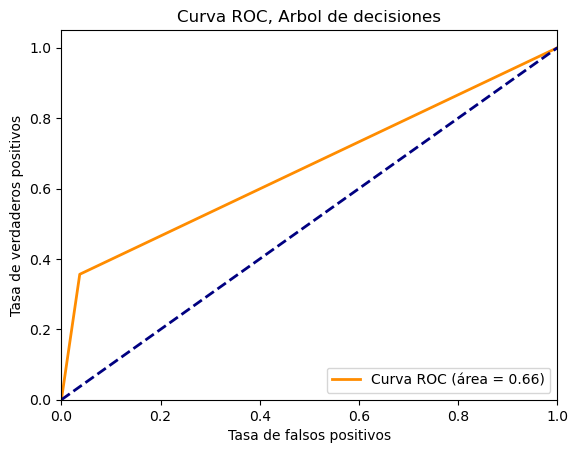

In [194]:
fpr, tpr, thresholds = roc_curve(y_pre, y_pred_dt)
roc_auc = roc_auc_score(y_pre, y_pred_dt)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC, Arbol de decisiones')
plt.legend(loc="lower right")
plt.show()

[[6143  941]
 [ 236  521]]


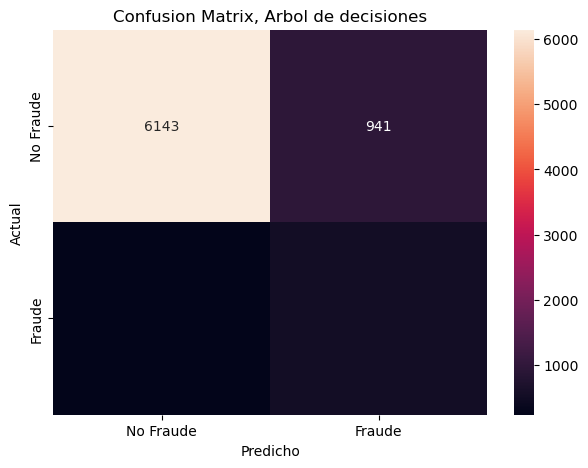

In [203]:
cm_2 =confusion_matrix(y_pred_dt,y_pre)
print(cm_2)

plt.figure(figsize=(7, 5))
sns.heatmap(cm_2, annot=True, fmt='d', xticklabels=['No Fraude', 'Fraude'], yticklabels=['No Fraude', 'Fraude'])
plt.xlabel('Predicho')
plt.ylabel('Actual')
plt.title('Confusion Matrix, Arbol de decisiones')
plt.show()

### 3. Random Forest

In [118]:
from sklearn.ensemble import RandomForestClassifier
param_grid = [{'max_depth': [2,4,6,8,10,12,20,33,],
              'n_estimators': [10,50,200]}
]

rf_clf = RandomForestClassifier()

grid_search = GridSearchCV(rf_clf, param_grid, cv=5,
                           return_train_score=True)

grid_search.fit(X_train, y_train)

c:\Users\herna\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\herna\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\herna\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\herna\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Pleas

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [2, 4, 6, 8, 10, 12, 20, 33],
                          'n_estimators': [10, 50, 200]}],
             return_train_score=True)

In [119]:
cvres = grid_search.cv_results_
for values in zip(cvres['mean_test_score'], cvres['params']):
    print(values)

(0.8214721491574435, {'max_depth': 2, 'n_estimators': 10})
(0.8205426645593727, {'max_depth': 2, 'n_estimators': 50})
(0.8188475550523577, {'max_depth': 2, 'n_estimators': 200})
(0.842898693739726, {'max_depth': 4, 'n_estimators': 10})
(0.8454135350254942, {'max_depth': 4, 'n_estimators': 50})
(0.8464522942821994, {'max_depth': 4, 'n_estimators': 200})
(0.8508251633852641, {'max_depth': 6, 'n_estimators': 10})
(0.8529571324464749, {'max_depth': 6, 'n_estimators': 50})
(0.8536677688768497, {'max_depth': 6, 'n_estimators': 200})
(0.8523012304718056, {'max_depth': 8, 'n_estimators': 10})
(0.8567288938006616, {'max_depth': 8, 'n_estimators': 50})
(0.8570021476885937, {'max_depth': 8, 'n_estimators': 200})
(0.8537770435354842, {'max_depth': 10, 'n_estimators': 10})
(0.8592434362360027, {'max_depth': 10, 'n_estimators': 50})
(0.8602820759525371, {'max_depth': 10, 'n_estimators': 200})
(0.8542144410204486, {'max_depth': 12, 'n_estimators': 10})
(0.8621950922484027, {'max_depth': 12, 'n_estima

In [186]:
rf_clf = RandomForestClassifier(max_depth= 20, n_estimators= 200)
rf_clf.fit(X_train, y_train)
y_pred_rf=rf_clf.predict(X_pre)

c:\Users\herna\anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [187]:
print(f"score de prueba: {rf_clf.score(X_train, y_train)}")
print(f"score de test: {rf_clf.score(X_pre, y_pre)}")

score de prueba: 0.9697168470536788
score de test: 0.8627726055350083


In [188]:
from sklearn.metrics import classification_report
print(classification_report(y_pre, y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      6379
           1       0.72      0.43      0.54      1462

    accuracy                           0.86      7841
   macro avg       0.80      0.70      0.73      7841
weighted avg       0.85      0.86      0.85      7841



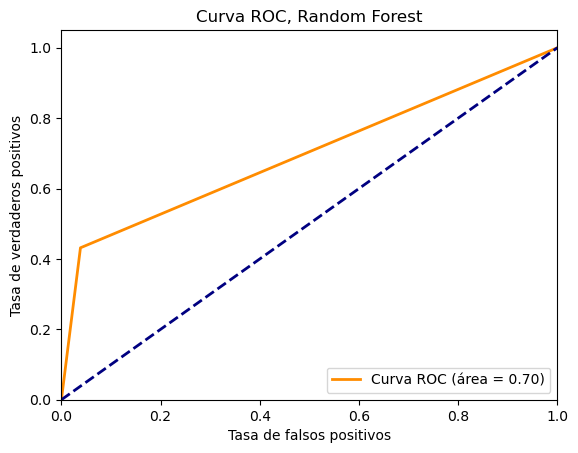

In [191]:

fpr, tpr, thresholds = roc_curve(y_pre, y_pred_rf)
roc_auc = roc_auc_score(y_pre, y_pred_rf)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC, Random Forest')
plt.legend(loc="lower right")
plt.show()

[[6134  831]
 [ 245  631]]


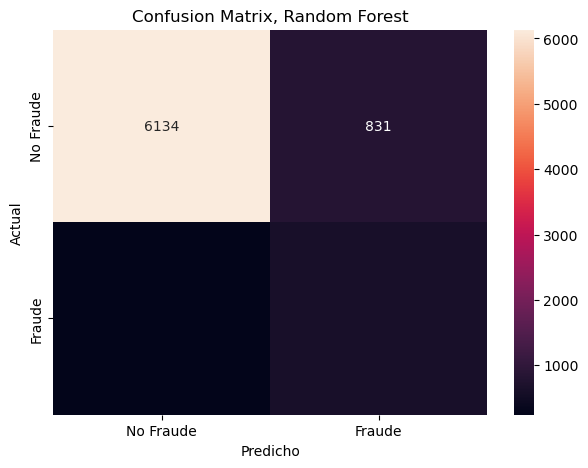

In [204]:
cm_3 =confusion_matrix(y_pred_rf,y_pre)
print(cm_3)

plt.figure(figsize=(7, 5))
sns.heatmap(cm_3, annot=True, fmt='d', xticklabels=['No Fraude', 'Fraude'], yticklabels=['No Fraude', 'Fraude'])
plt.xlabel('Predicho')
plt.ylabel('Actual')
plt.title('Confusion Matrix, Random Forest')
plt.show()

# Deep Learning

In [103]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout,LayerNormalization
from tensorflow.keras.regularizers import l2

model_2 = Sequential()

model_2.add(Dense(13,input_shape = (24,)))
model_2.add(Dropout(0.25))
model_2.add(LayerNormalization())


model_2.add(Dense(5))
model_2.add(Dropout(0.25))
model_2.add(LayerNormalization())



model_2.add(Dense(1, activation="sigmoid"))

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 13)                325       
                                                                 
 dropout_2 (Dropout)         (None, 13)                0         
                                                                 
 layer_normalization_2 (Laye  (None, 13)               26        
 rNormalization)                                                 
                                                                 
 dense_4 (Dense)             (None, 5)                 70        
                                                                 
 dropout_3 (Dropout)         (None, 5)                 0         
                                                                 
 layer_normalization_3 (Laye  (None, 5)                10        
 rNormalization)                                      

In [104]:
model_2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
history_1 = model_2.fit(X_train, y_train,
                    validation_data = (X_val, y_val),batch_size=200,
                    epochs=400)

Epoch 1/400
92/92 [==============================] - 2s 6ms/step - loss: 0.6427 - accuracy: 0.6794 - val_loss: 0.5037 - val_accuracy: 0.8136
Epoch 2/400
92/92 [==============================] - 0s 3ms/step - loss: 0.4974 - accuracy: 0.8051 - val_loss: 0.4860 - val_accuracy: 0.8136
Epoch 3/400
92/92 [==============================] - 0s 3ms/step - loss: 0.4905 - accuracy: 0.8103 - val_loss: 0.4828 - val_accuracy: 0.8136
Epoch 4/400
92/92 [==============================] - 0s 3ms/step - loss: 0.4865 - accuracy: 0.8119 - val_loss: 0.4820 - val_accuracy: 0.8136
Epoch 5/400
92/92 [==============================] - 0s 3ms/step - loss: 0.4830 - accuracy: 0.8130 - val_loss: 0.4787 - val_accuracy: 0.8136
Epoch 6/400
92/92 [==============================] - 0s 3ms/step - loss: 0.4836 - accuracy: 0.8126 - val_loss: 0.4785 - val_accuracy: 0.8136
Epoch 7/400
92/92 [==============================] - 0s 3ms/step - loss: 0.4825 - accuracy: 0.8127 - val_loss: 0.4777 - val_accuracy: 0.8136
Epoch 8/400
9

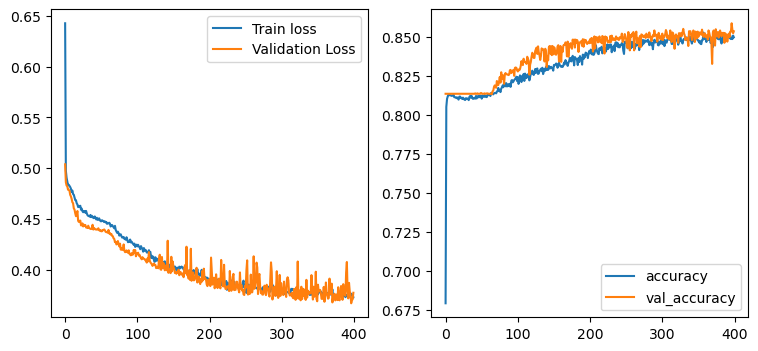

In [105]:
fig, ax =plt.subplots(1,2,figsize=(9,4))
ax[0].plot(history_1.history['loss'], label='Train loss')
ax[0].plot(history_1.history['val_loss'], label='Validation Loss')
ax[0].legend()

ax[1].plot(history_1.history['accuracy'], label='accuracy')
ax[1].plot(history_1.history['val_accuracy'], label='val_accuracy')
ax[1].legend()

plt.show()

123/123 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

       False       0.97      0.87      0.91      3563
        True       0.34      0.71      0.46       357

    accuracy                           0.85      3920
   macro avg       0.66      0.79      0.69      3920
weighted avg       0.91      0.85      0.87      3920

[[3084  479]
 [ 105  252]]


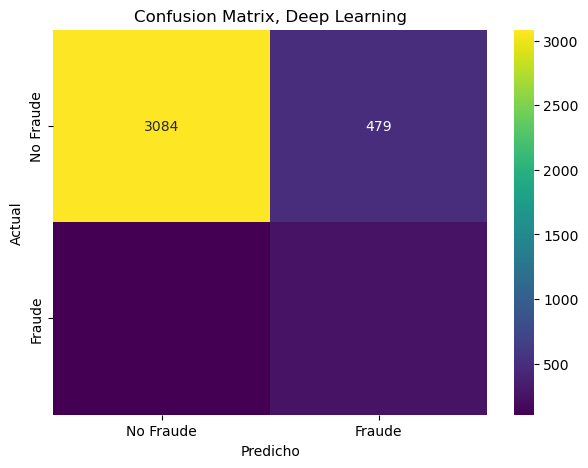

In [206]:
model_2.evaluate(X_test,y_test)

y_pred = model_2.predict(X_test)
y_pred = (y_pred>0.5)

print(classification_report(y_pred,y_test))

cm_dl = confusion_matrix(y_pred,y_test)
print(cm_dl)

plt.figure(figsize=(7, 5))
sns.heatmap(cm_dl, annot=True, fmt='d', cmap='viridis', xticklabels=['No Fraude', 'Fraude'], yticklabels=['No Fraude', 'Fraude'])
plt.xlabel('Predicho')
plt.ylabel('Actual')
plt.title('Confusion Matrix, Deep Learning')
plt.show()


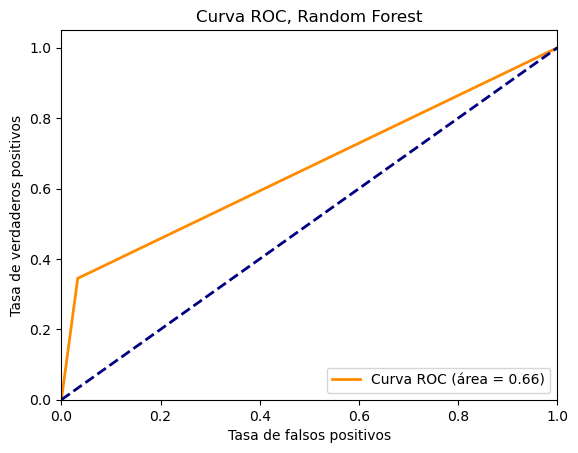

In [207]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC, Random Forest')
plt.legend(loc="lower right")
plt.show()